In [1]:
pwd


'/content'

In [2]:
import pandas as pd
import numpy as np

In [3]:
!pip install keras==2.2.4
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 312 kB 8.1 MB/s 
     |████████████████████████████████| 50 kB 4.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.2.4 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.5 MB/s 
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [4]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Visualizing the Image data**

In [5]:
import matplotlib.pyplot as plt

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
single_image = x_train[0]

In [8]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
single_image.shape

(28, 28)

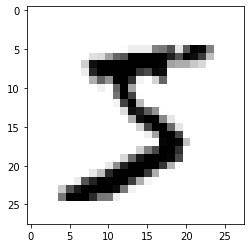

In [10]:
plt.imshow(single_image,cmap='binary')

**PreProcessing Data**

Labels

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train.shape

(60000,)

In [15]:
y_example = to_categorical(y_train)

In [16]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
y_example.shape

(60000, 10)

In [18]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
y_cat_test = to_categorical(y_test,10)

In [20]:
y_cat_train = to_categorical(y_train,10)

**Processing X Data**

In [21]:
single_image.max()

255

In [22]:
single_image.min()

0

In [23]:
x_train = x_train/255
x_test = x_test/255

In [24]:
scaled_single = x_train[0]

In [25]:
scaled_single.max()

1.0

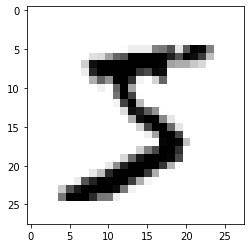

In [26]:
plt.imshow(scaled_single,cmap='binary')

**Reshaping the Data**

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_test.shape



(10000, 28, 28)

In [29]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [30]:
x_train.shape

(60000, 28, 28, 1)

In [31]:
x_test = x_test.reshape(10000,28,28,1)

In [32]:
x_test.shape

(10000, 28, 28, 1)

**Training the Model**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten


In [34]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

**Train the Model**

In [38]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 43s 22ms/step - loss: 0.1350 - accuracy: 0.9596 - val_loss: 0.0507 - val_accuracy: 0.9844
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0466 - val_accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0297 - accuracy: 0.9901 - val_loss: 0.0439 - val_accuracy: 0.9855
Epoch 4/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0433 - val_accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0407 - val_accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0421 - val_accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.0551 -

**Evaluate the Model**

In [40]:
model.metrics_names

['loss', 'accuracy']

In [41]:
losses = pd.DataFrame(model.history.history)

In [43]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.134955,0.959583,0.050686,0.9844
1,0.045894,0.985817,0.046615,0.9844
2,0.029670,0.990083,0.043897,0.9855
3,0.020399,0.993283,0.043285,0.9869
4,0.013843,0.995583,0.040672,0.9882


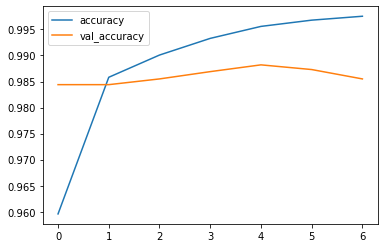

In [44]:
losses[['accuracy','val_accuracy']].plot()

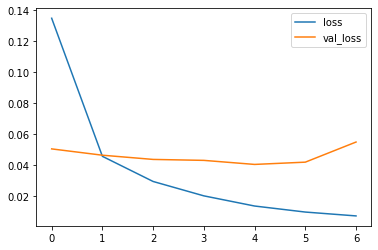

In [45]:
losses[['loss','val_loss']].plot()

In [46]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.055112324655056, 0.9854999780654907]


In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 2s 6ms/step


In [49]:
y_cat_test.shape

(10000, 10)

In [50]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [51]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 2s 6ms/step


array([1.4877033e-12, 1.6863354e-12, 7.3759894e-11, 2.1931147e-10,
       3.6165279e-12, 2.1658570e-14, 4.5198462e-19, 9.9999994e-01,
       2.1919635e-11, 7.0255572e-11], dtype=float32)

In [52]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [53]:
import seaborn as sns

**Predicting a given image**

In [54]:
my_number = x_test[0]

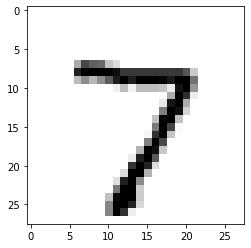

In [55]:
plt.imshow(my_number.reshape(28,28),cmap='binary')

In [56]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_number.reshape(1,28,28,1))predict_x=model.predict(my_number.reshape(1,28,28,1)) 
classes_x=np.argmax(predict_x,axis=1)
plt.imshow(predict_x)

1/1 [==============================] - 0s 19ms/step


array([[1.4876920e-12, 1.6863226e-12, 7.3759478e-11, 2.1930981e-10,
        3.6165005e-12, 2.1658446e-14, 4.5197774e-19, 1.0000000e+00,
        2.1919511e-11, 7.0255038e-11]], dtype=float32)

1/1 [==============================] - 0s 27ms/step


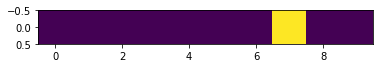

In [57]:
predict_x=model.predict(my_number.reshape(1,28,28,1)) 
classes_x=np.argmax(predict_x,axis=1)
plt.imshow(predict_x)

In [58]:
model.save('CNN-MNIST.h5')

In [59]:
!tar -zcvf CNN-MNIST.tgz CNN_MNIST.h5

tar: CNN_MNIST.h5: Cannot stat: No such file or directory
tar: Exiting with failure status due to previous errors


In [60]:
ls -l

total 6980
-rw-r--r-- 1 root root 7135768 Nov 18 05:58 CNN-MNIST.h5
-rw-r--r-- 1 root root      45 Nov 18 05:58 CNN-MNIST.tgz
drwxr-xr-x 1 root root    4096 Nov 16 14:35 sample_data/


In [61]:
!pip install watson-machine-learning-client --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 7.1 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 132 kB 53.4 MB/s 
     |████████████████████████████████| 9.9 MB 26.4 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 140 kB 60.3 MB/s 
     |████████████████████████████████| 956 kB 55.7 MB/s 
     |████████████████████████████████| 135 kB 50.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=45d24b318790ff53acb864ceef5c75b316ef09edce51d67572e8850afbaaeb02
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=a1d5e9b6eba

In [ ]:
from ibm_watson_machine_learning import APIClient
uml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "zzJDRiaZV0T0gSYU7Un_vtScLyxWH7tZ50Pre4jj-Mzn"
}
client = APIClient(uml_credentials)

In [ ]:
print(client)

In [ ]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])

In [ ]:
space_uid = guid_from_space_name(client, 'cnnmodel')
print("Space_UID=" + space_uid)

In [ ]:
client.software_specifications.list()